## Exercises

**Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [92]:
resp = nsfg.ReadFemResp()

In [93]:
# Solution 
pmf = thinkstats2.Pmf(resp.numkdhh, label='numkdhh')

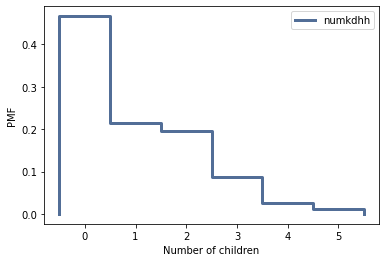

In [94]:
# Solution 
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [95]:
# Solution 
biased = BiasPmf(pmf, label='biased')

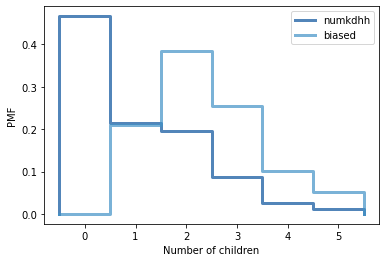

In [96]:
# Solution 
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [97]:
# Solution 
pmf.Mean()

1.024205155043831

In [98]:
# Solution 
biased.Mean()


2.403679100664282

**Exercise:** I started this book with the question, "Are first babies more likely to be late?" To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two live births and compute pairwise differences. Does this formulation of the question yield a different result?

Hint: use `nsfg.MakePregMap`:

In [99]:
live, firsts, others = first.MakeFrames()

In [100]:
preg_map = nsfg.MakePregMap(live)

In [101]:
# Solution 
hist = thinkstats2.Hist()

for caseid, indices in preg_map.items():
    if len(indices) >= 2:
        pair = preg.loc[indices[0:2]].prglngth
        diff = np.diff(pair)[0]
        hist[diff] += 1

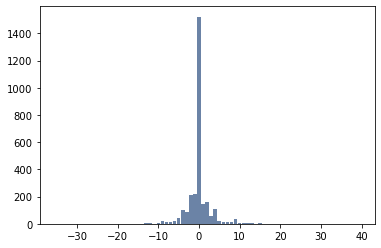

In [102]:
# Solution 
thinkplot.Hist(hist)

In [103]:
# Solution 
pmf = thinkstats2.Pmf(hist)
pmf.Mean()

-0.056367432150313125

**Exercise:** In most foot races, everyone starts at the same time. If you are a fast runner, you usually pass a lot of people at the beginning of the race, but after a few miles everyone around you is going at the same speed.
When I ran a long-distance (209 miles) relay race for the first time, I noticed an odd phenomenon: when I overtook another runner, I was usually much faster, and when another runner overtook me, he was usually much faster.

At first I thought that the distribution of speeds might be bimodal; that is, there were many slow runners and many fast runners, but few at my speed.

Then I realized that I was the victim of a bias similar to the effect of class size. The race was unusual in two ways: it used a staggered start, so teams started at different times; also, many teams included runners at different levels of ability.

As a result, runners were spread out along the course with little relationship between speed and location. When I joined the race, the runners near me were (pretty much) a random sample of the runners in the race.

So where does the bias come from? During my time on the course, the chance of overtaking a runner, or being overtaken, is proportional to the difference in our speeds. I am more likely to catch a slow runner, and more likely to be caught by a fast runner. But runners at the same speed are unlikely to see each other.

Write a function called `ObservedPmf` that takes a `Pmf` representing the actual distribution of runners’ speeds, and the speed of a running observer, and returns a new `Pmf` representing the distribution of runners’ speeds as seen by the observer.

To test your function, you can use `relay.py`, which reads the results from the James Joyce Ramble 10K in Dedham MA and converts the pace of each runner to mph.

Compute the distribution of speeds you would observe if you ran a relay race at 7 mph with this group of runners.

In [104]:
import relay

results = relay.ReadResults()
speeds = relay.GetSpeeds(results)
speeds = relay.BinData(speeds, 3, 12, 100)

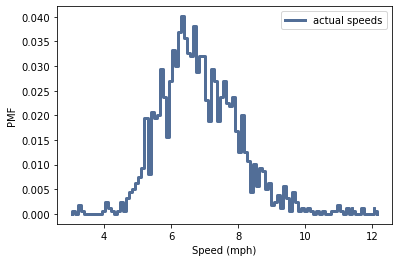

In [105]:
pmf = thinkstats2.Pmf(speeds, 'actual speeds')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Speed (mph)', ylabel='PMF')

In [106]:
# Solution 

def ObservedPmf(pmf, speed, label=None):
    """Returns a new Pmf representing speeds observed at a given speed.

    The chance of observing a runner is proportional to the difference
    in speed.

    Args:
        pmf: distribution of actual speeds
        speed: speed of the observing runner
        label: string label for the new dist

    Returns:
        Pmf object
    """
    new = pmf.Copy(label=label)
    for val in new.Values():
        diff = abs(val - speed)
        new[val] *= diff
    new.Normalize()
    return new

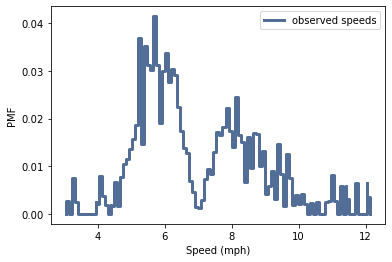

In [107]:
# Solution 
biased = ObservedPmf(pmf, 7, label='observed speeds')
thinkplot.Pmf(biased)
thinkplot.Config(xlabel='Speed (mph)', ylabel='PMF')

# Exercies Chapter 04

**Exercise:** How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [46]:
# Solution 

other_cdf.PercentileRank(10.5)

99.29411764705883

Exercise: The numbers generated by numpy.random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from numpy.random.random and plot their PMF. What goes wrong?

Now plot the CDF. Is the distribution uniform?

In [47]:
# Solution 
t = np.random.random(1000)

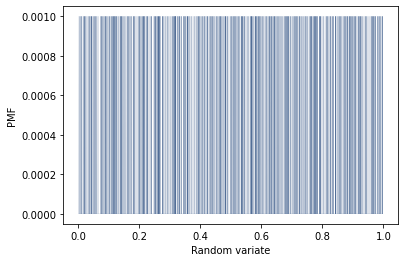

In [48]:
# Solution 
pmf = thinkstats2.Pmf(t)
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random variate', ylabel='PMF')


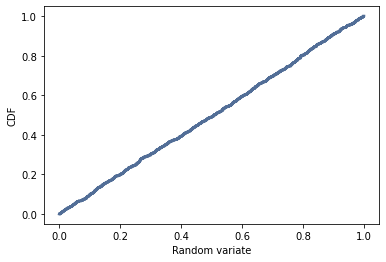

In [49]:
# Solution
cdf = thinkstats2.Cdf(t)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Random variate', ylabel='CDF')